In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import pandas as pd

# Set simulation parameters
Vthresh = -50   #mV
Vreset  = -70   #mV resting potential (going to value after spike)
Vspike  =  20   #mV
Rm      =  10   #MOhms lower Resistance = lower spikes
tau     =  10   #ms
dt      =  0.5 #ms
counter =  0
i = 0 #counting the number of iterations
time = 1000 #ms
Se = 0.01 #strength of spike
r = 100/1000 #constant (spikes/ms) asked for frequency of 30Hz
counter_poisson = 0 #counting number of spikes
tau_e = 5 #excitatory conductance time constant
Ve = 0 #excitatory reversal potential

timeVector = np.arange(0, time, dt) #creating time vector of intervals of size dt

geVector = np.zeros(len(timeVector)) #amount spike jumps, excitatory conductance
spikeVector = np.zeros(len(timeVector)) #holding 1s for spike and 0 for no spike at given interval\
xVector = np.random.uniform(0,1, size = len(timeVector)) #create xVector of same length of timeVector to store uniform values between 0 and 1





In [2]:
#Euler 

# Creates a placeholder for our voltages that is the same size as timeVector
voltageVector = np.zeros(len(timeVector))



# Creates a placeholder for the external stimulation vector.
# It is also the same size as the time vector.
stimVector = np.zeros(len(timeVector))

#set external current to 1.7nA
stimVector[0:] = 1.7

# Set the initial voltage to be equal to the resting potential
voltageVector[0] = Vreset

In [3]:
#Euler
counter_poisson = 0
# This line initiates the loop. "S" counts the number of loops.
# We are looping for 1 less than the length of the time vector
# because we have already calculated the voltage for the first
# iteration.
for S in range(len(timeVector)-1):

    #Vinf equation
    Vinf = ((Rm * stimVector[S])/tau) + (Vreset - voltageVector[S])/tau + (Rm*geVector[S]*(Ve - voltageVector[S]))/tau # ((E + I*R)/tau) + (-v[i]/tau) #differential equation
    
    voltageVector[S+1] = Vinf * dt + voltageVector[S]  #v[i+1] = v[i] + dt *Vinf
    
    #upadate conductance decay as if no spike
    geVector[S+1] = geVector[S] * np.exp(-dt/tau_e)
    
    
  # This 'if' condition states that if the next voltage is greater than
  # or equal to the threshold, then to run the next section
    if voltageVector[S+1] >= Vthresh:
     # This states that the next voltage vector will be the Vspike value
        voltageVector[S+1] = Vspike
     
     # This 'if' statement checks if we are already at Vspike (this is
     # another way we can be above Vthresh)
        if voltageVector[S] == Vspike:
            #print(S) This prints the timing of spikes
            spikeVector[S] = 1 #add a 1 to indicate a spike in spikeVector
            
            #upadate conductance as if no spike
            #geVector[i] = geVector[i-1] * np.exp(-dt/j)
            counter_poisson += 1
            
            
        # Set the next voltage equal to the reset value
            voltageVector[S+1] = Vreset
            
            
    j = timeVector[S]
           
    while j < timeVector[S+1]:
    
        j = -np.log(np.random.uniform(0,1))/r + timeVector[S] #r in ms Calculate wait time
       
        if j <= timeVector[S+1]: # see if wait time is in interval
        #if so, update conductance
            geVector[S+1] = geVector[S] +Se

print(sum(spikeVector)) #number of spikes

20.0


Text(0.5, 1.0, 'Conductance versus time')

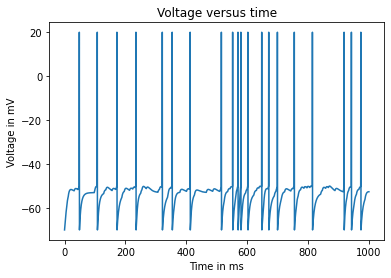

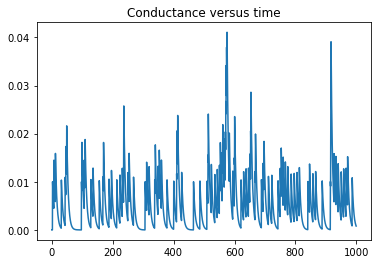

In [4]:
#Voltage and Conductance Plots

# This plots the voltage (y-axis) as a function of time (x-axis)
plt.plot(timeVector, voltageVector)

# This sets the title
plt.title('Voltage versus time')

plt.ylabel('Voltage in mV')

# This labels the x-axis
plt.xlabel('Time in ms')

plt.figure()

# This plots the voltage (y-axis) as a function of time (x-axis)
plt.plot(timeVector, geVector)

# This sets the title
plt.title('Conductance versus time')



